In [2]:
# !pip install pandas

In [35]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 40)


In [5]:
df = pd.read_csv('../data/carclaims.csv')

In [6]:
df.head()

,Serial No.,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [7]:
df.drop('Serial No.', axis=1, inplace=True)

In [8]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [9]:
df.shape

(15420, 33)

## Exploratory Data Analysis

In [10]:
df['FraudFound'].value_counts()

No     14497
Yes      923
Name: FraudFound, dtype: int64

As we can see, the dataset is highly imbalanced.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [12]:
# !pip install matplotlib
# !pip install seaborn

In [13]:
fraud = {'Yes': 1,'No': 0}
  
df['FraudFound'] = [fraud[item] for item in df['FraudFound']]
df['FraudFound'].value_counts()

0    14497
1      923
Name: FraudFound, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [15]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print("{1} has {2} null values".format(col, df[col].isna().sum()))

In [16]:
fraudbyMonth = pd.DataFrame(df.groupby('Month')['FraudFound'].sum())
fraudbyMonth.reset_index(inplace=True)
fraudbyMonth

,Month,FraudFound
0,Apr,80
1,Aug,84
2,Dec,62
3,Feb,82
4,Jan,87
5,Jul,60
6,Jun,80
7,Mar,102
8,May,94
9,Nov,46


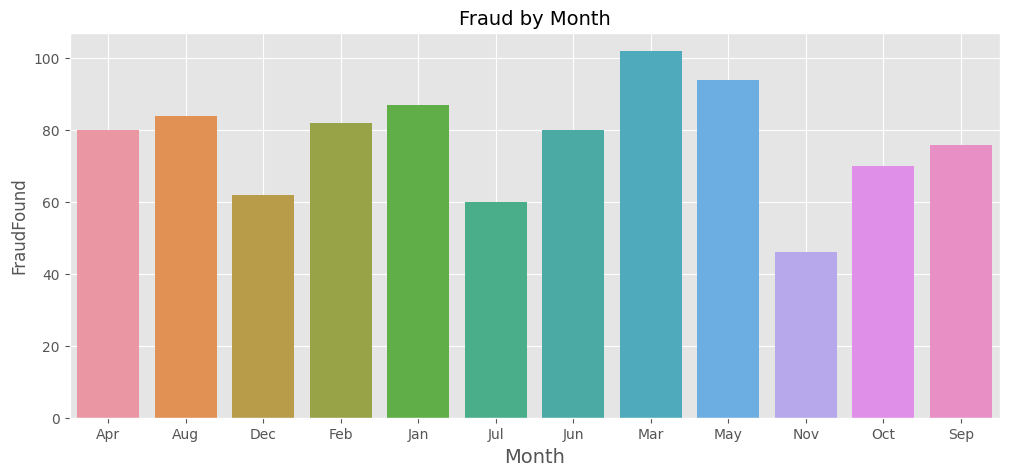

In [17]:
fig = plt.figure(figsize = (12,5))
sns.barplot(data=fraudbyMonth, x='Month', y='FraudFound')
plt.title('Fraud by Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
# plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

In [18]:
for col in df.columns:
    print(df[col].value_counts())

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekCla

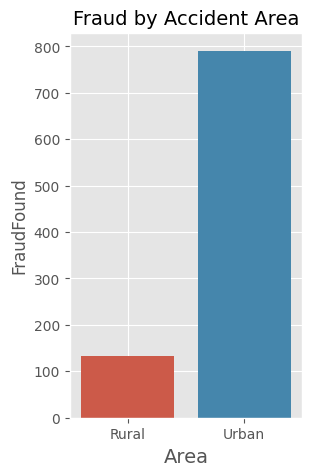

In [19]:
plot_data2 = pd.DataFrame(df.groupby('AccidentArea')['FraudFound'].sum())
plot_data2.reset_index(inplace=True)

fig = plt.figure(figsize = (3,5))
sns.barplot(data=plot_data2, x='AccidentArea', y='FraudFound')
plt.title('Fraud by Accident Area', fontsize=14)
plt.xlabel('Area', fontsize=14)
# plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

We can intrepret from the bar chart above, the claims reported majorly from the urban areas tend to be more fraudulent than those from the rural areas.

In [20]:
df['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

In [21]:
df['Age_Group'] = pd.cut(df['Age'],bins=[0,9,19,29,39,49,59,69,79,89],labels=["0-9", "10-19","20-29","30-39","40-49","50-59", "60-69","70-79","80-89"])

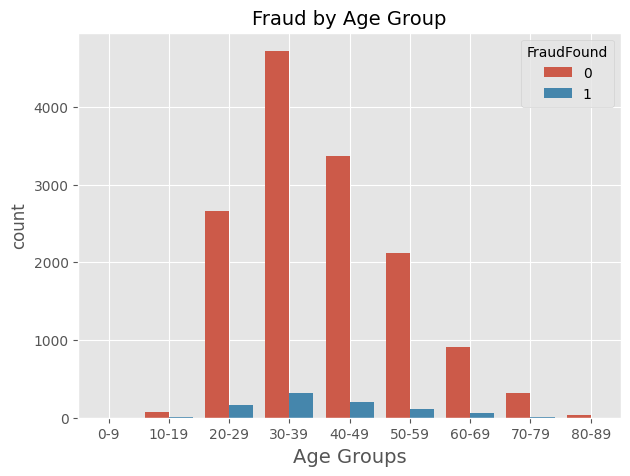

In [22]:
fig = plt.figure(figsize = (7,5))
# df.groupby('FraudFound')['Age'].plot(kind='kde', legend=True)

sns.countplot(data=df, x='Age_Group', hue='FraudFound')
plt.title('Fraud by Age Group', fontsize=14)
plt.xlabel('Age Groups', fontsize=14)
# plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

We ca nsee that people in the age group 30-50 have an affinity to make fraudulent claims more than the people from other age groups.

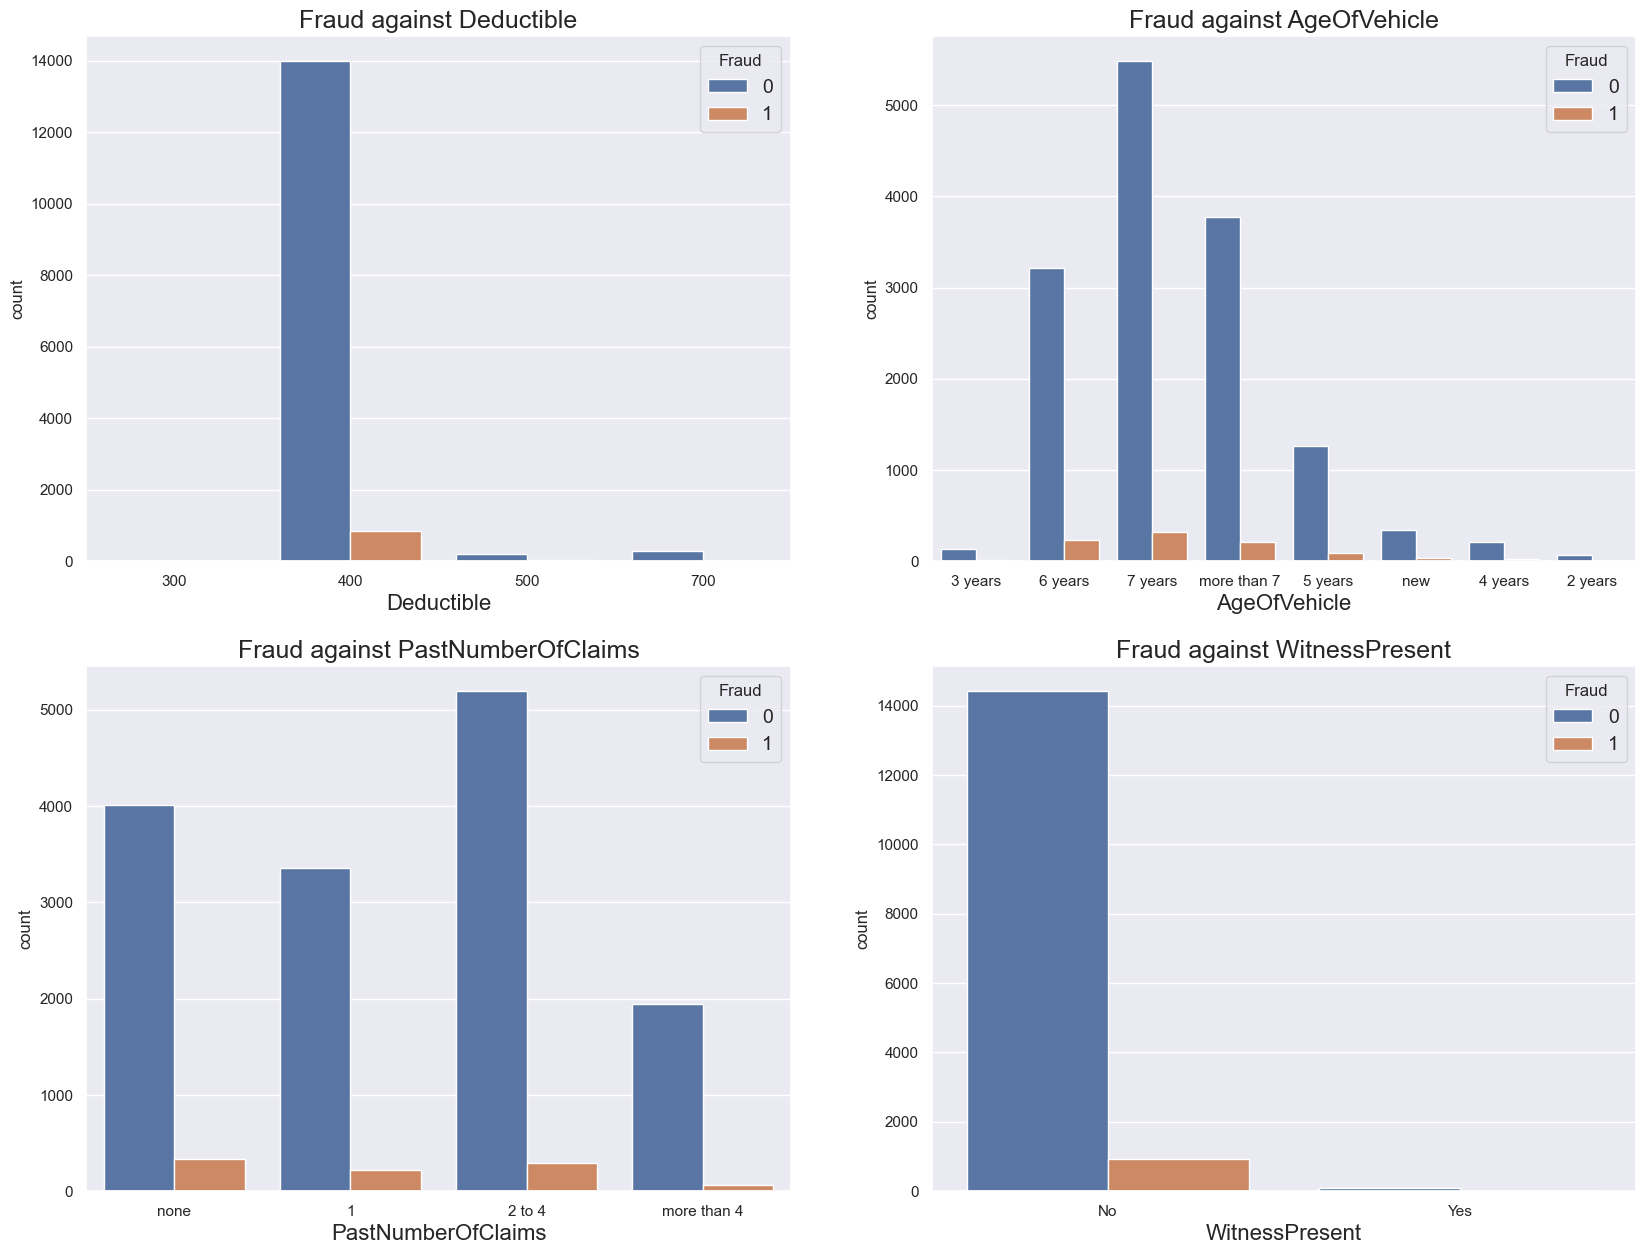

In [23]:
plot_cols = ['Deductible', 'AgeOfVehicle', 'PastNumberOfClaims', 'WitnessPresent']
i=1
fig = plt.figure(figsize = (20,15))
for col in plot_cols:
    sns.set(style="darkgrid")
    plt.subplot(2,2,i)
    ax = sns.countplot(data=df, x=col, hue='FraudFound')
    plt.title(f'Fraud against {col}', fontsize=18)
    plt.xlabel(f'{col}', fontsize=16)
    plt.legend(title="Fraud", fontsize=14)
    i+=1

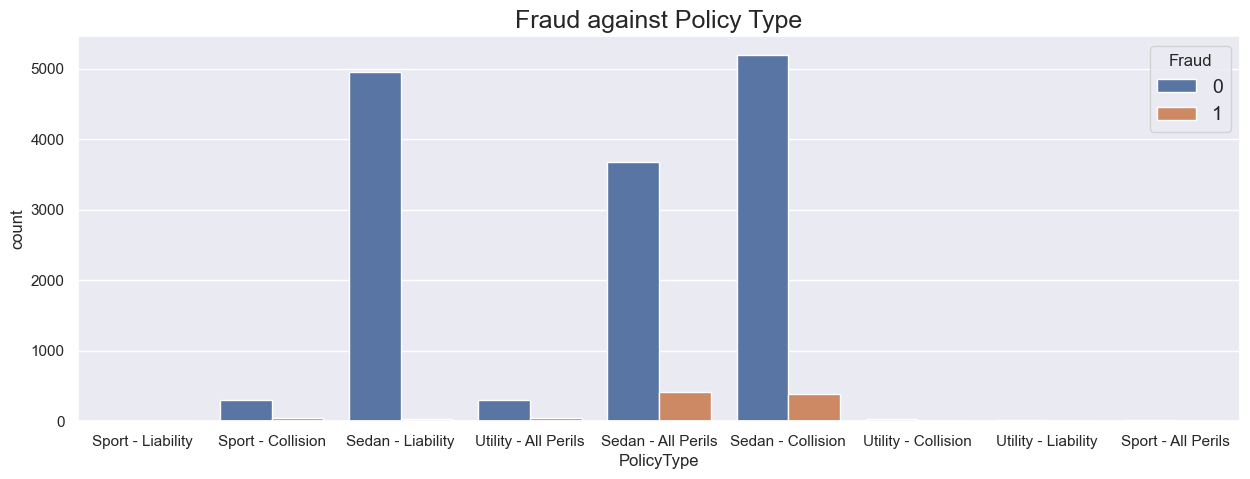

In [24]:
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='PolicyType', hue='FraudFound')
plt.title(f'Fraud against Policy Type', fontsize=18)
plt.legend(title="Fraud", fontsize=14)

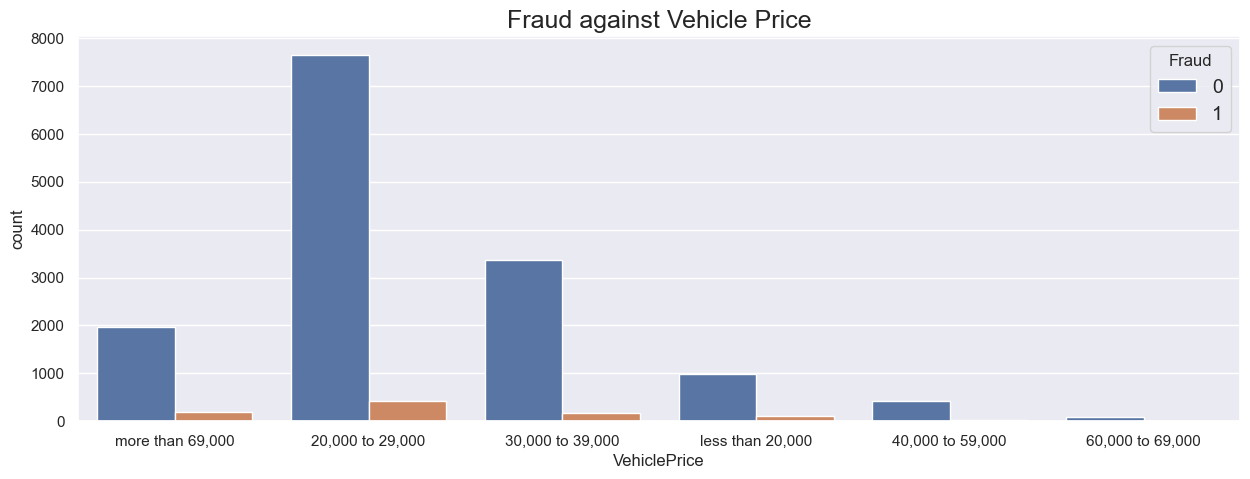

In [25]:
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='VehiclePrice', hue='FraudFound')
plt.title(f'Fraud against Vehicle Price', fontsize=18)
plt.legend(title="Fraud", fontsize=14)

The deductible, Age of vehicle, witness presence, polict type and vehicle price give a significant information in ragards to frauds. The past number of claims do not give any distinct info as to which is more prone to claim being fraudulent, hence, we will drop it.

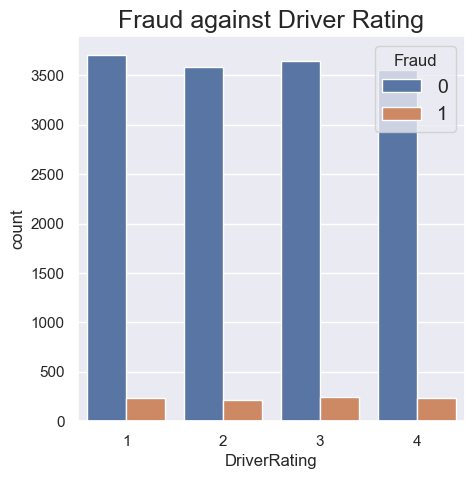

In [26]:
#DriverRating
plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='DriverRating', hue='FraudFound')
plt.title(f'Fraud against Driver Rating', fontsize=18)
plt.legend(title="Fraud", fontsize=14)

In [27]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Age_Group'],
      dtype='object')

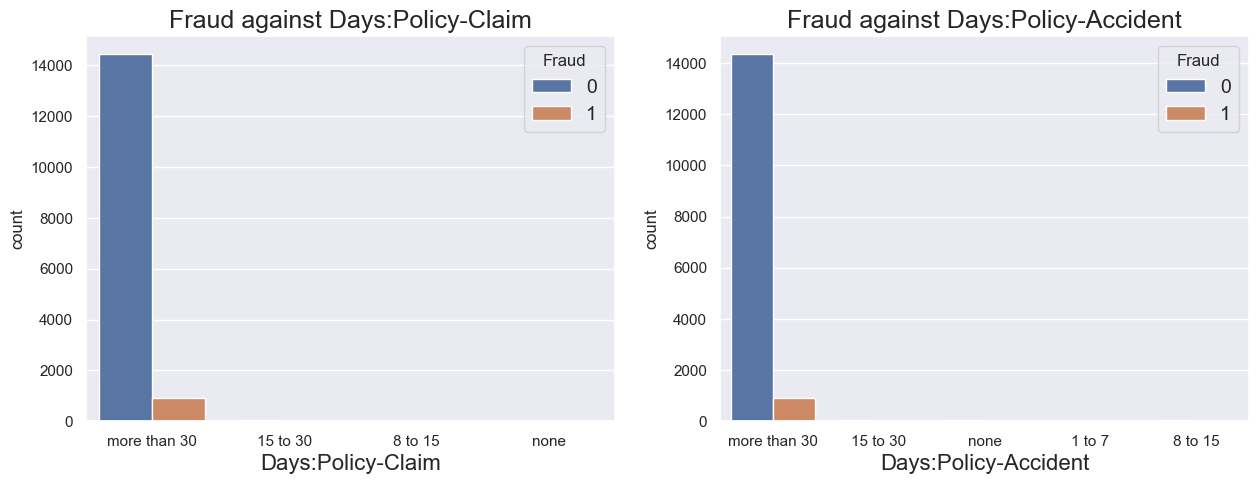

In [28]:
#Policy-Accident
cols = ['Days:Policy-Claim', 'Days:Policy-Accident']
i=1
fig = plt.figure(figsize = (15,5))
for col in cols:
    sns.set(style="darkgrid")
    plt.subplot(1,2,i)
    ax = sns.countplot(data=df, x=col, hue='FraudFound')
    plt.title(f'Fraud against {col}', fontsize=18)
    plt.xlabel(f'{col}', fontsize=16)
    plt.legend(title="Fraud", fontsize=14)
    i+=1

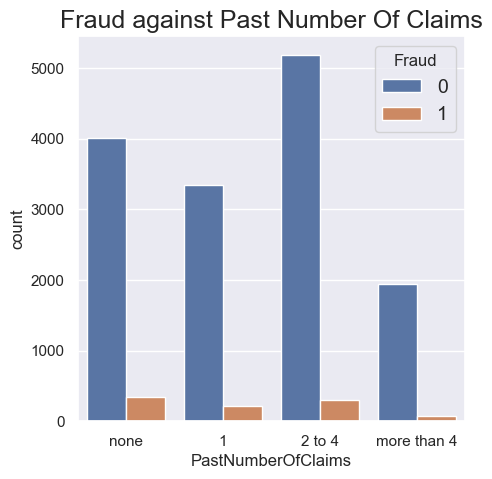

In [29]:
#PastNumberOfClaims
plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='PastNumberOfClaims', hue='FraudFound')
plt.title(f'Fraud against Past Number Of Claims', fontsize=18)
plt.legend(title="Fraud", fontsize=14)

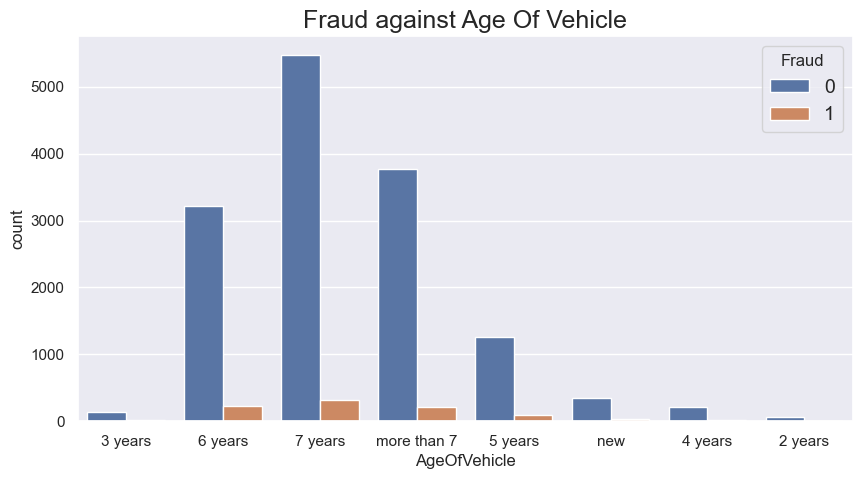

In [30]:
#AgeOfVehicle
plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='AgeOfVehicle', hue='FraudFound')
plt.title(f'Fraud against Age Of Vehicle', fontsize=18)
plt.legend(title="Fraud", fontsize=14)

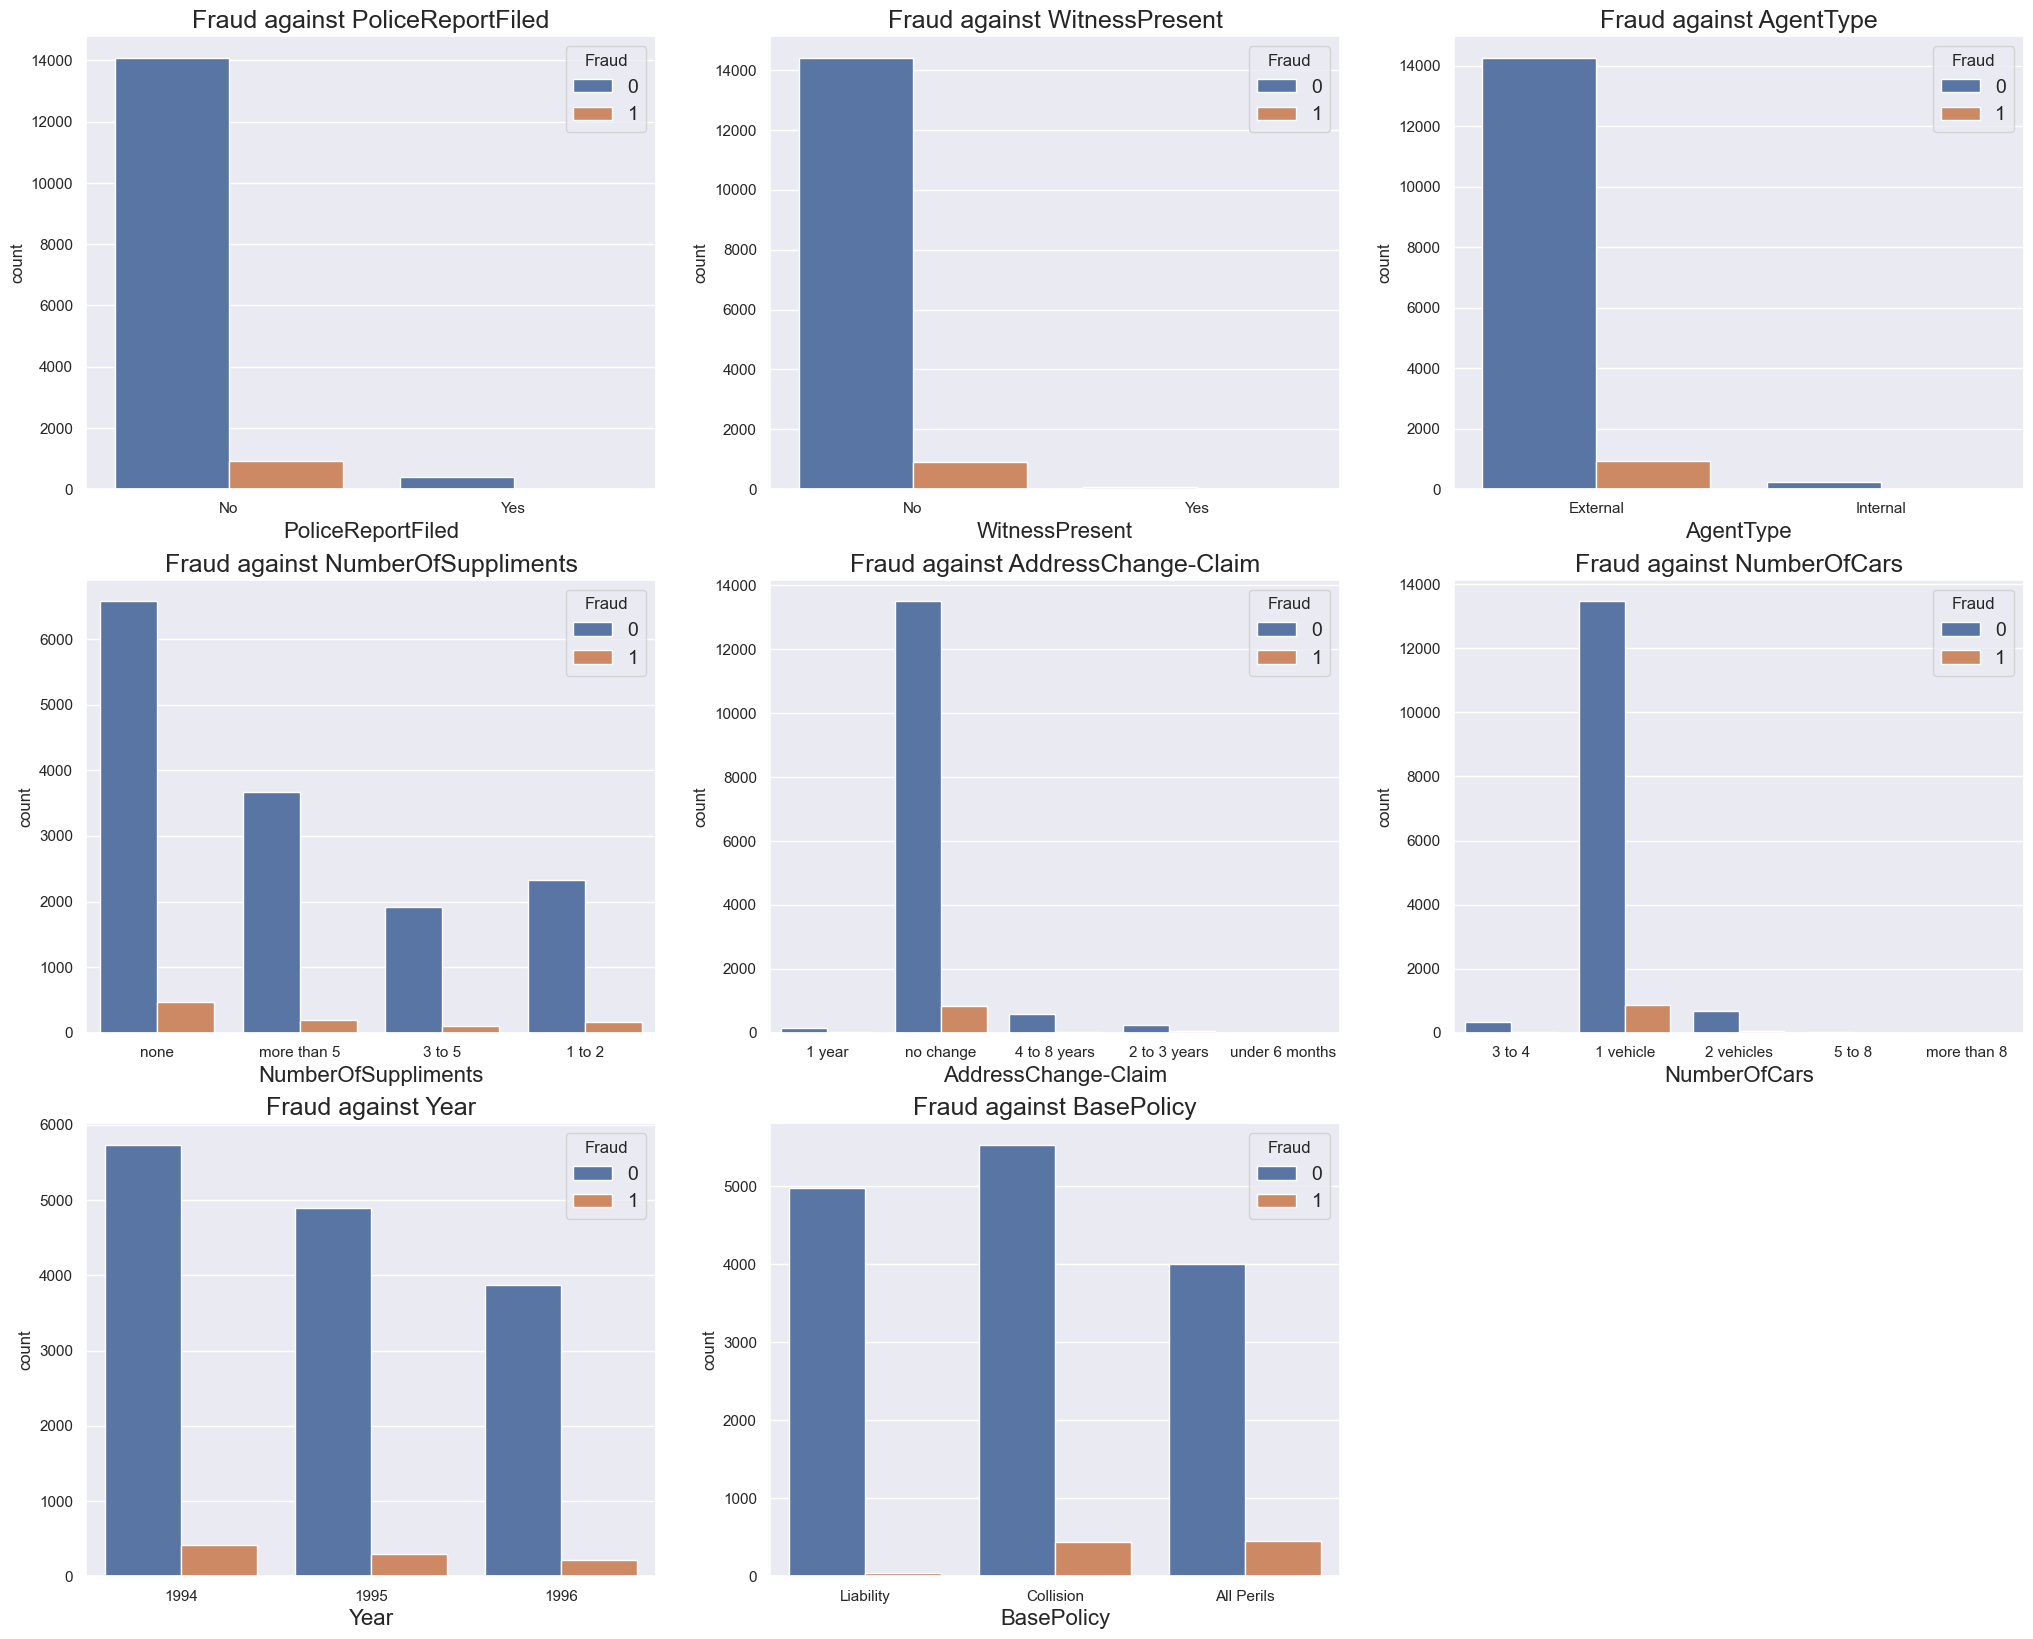

In [31]:
#Policy-Accident
cols = ['PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy']
i=1
fig = plt.figure(figsize = (25,20))
for col in cols:
    sns.set(style="darkgrid")
    plt.subplot(3,3,i)
    ax = sns.countplot(data=df, x=col, hue='FraudFound')
    plt.title(f'Fraud against {col}', fontsize=18)
    plt.xlabel(f'{col}', fontsize=16)
    plt.legend(title="Fraud", fontsize=14)
    i+=1

From the above visualizations:
- The driver rating does not give any significant information regarding the fraud, it can be dropped.
- For days between policy claim and policy accident, more than 30 days has more frauds. we will keep that.
- Past claims has no information, dropping it.
- More the age of vehicle, more chances of it's claim being fraudulent. Hence, we will keep the age of vehicle feature.


In [36]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Age_Group
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0,20-29
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0,30-39
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0,40-49
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0,60-69
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0,20-29


In [33]:
df.shape

(15420, 34)

### Considering only the fraudulent claims

In [39]:
df['FraudFound'].value_counts()

0    14497
1      923
Name: FraudFound, dtype: int64

In [38]:
fraud_data = df.loc[df['FraudFound']==1]
fraud_data.shape

(923, 34)

<AxesSubplot: ylabel='PolicyType'>

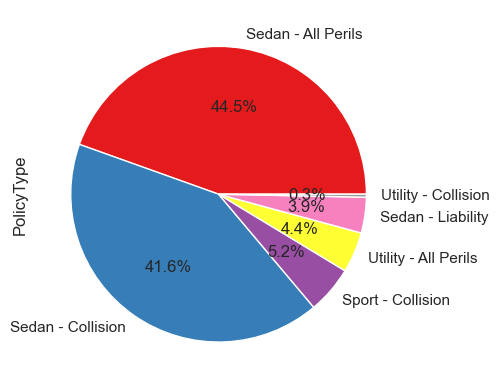

: 

In [46]:
fraud_data['PolicyType'].value_counts().plot.pie(autopct='%.1f%%', cmap='Set1')